<a href="https://colab.research.google.com/github/yeyevtushenko/AI/blob/Lesson29.04.2024/Lesson29_04_2024_AI_H_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання

* Завантажте дані
* Розділіть дані на тренувальні та тестові
* У `MyTokenizer` добавте обробку тексту за допомогою `nltk`, застосуйте **стематизацію**
* Застосуйте `TfidfVectorizer`
* Застосуйте `TruncatedSVD`
* Натренуйте модель [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) з параметром `kernel="linear"`, якщо вистачить пам'яті можна спробувати `kernel="rbf"`
* Виведіть результати

# Дані про телеграм

In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/telegram_spam.csv")

In [ ]:
df.head(9)

,text_type,text
0,spam,naturally irresistible your corporate identity...
1,spam,the stock trading gunslinger fanny is merrill ...
2,spam,unbelievable new homes made easy im wanting to...
3,spam,4 color printing special request additional in...
4,spam,do not have money get software cds from here s...
5,spam,great nnews hello welcome to medzonline sh gro...
6,spam,here s a hot play in motion homeland security ...
7,spam,save your money buy getting this thing here yo...
8,spam,undeliverable home based business for grownups...


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['text_type'], test_size=0.2, random_state=42)

In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')

class MyTokenizer:
    def __init__(self):
        self.stemmer = PorterStemmer()

    def __call__(self, document):
        tokens = word_tokenize(document)
        return [self.stemmer.stem(token) for token in tokens]

tokenizer = MyTokenizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
vectorizer = TfidfVectorizer(tokenizer=tokenizer, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warnings

In [ ]:
unique_counts = df['text_type'].value_counts()

ham = unique_counts['ham']
spam = unique_counts['spam']

class_weights = {'spam': ham/unique_counts.sum(), 'ham': spam/unique_counts.sum()}

print(f'count ham: {ham}\ncount spam: {spam}\nWeights: {class_weights}\nTotal: {unique_counts.sum()}')



count ham: 14337
count spam: 6011
Weights: {'spam': 0.704590131708276, 'ham': 0.295409868291724}
Total: 20348


In [ ]:
svd = TruncatedSVD(n_components=1000)
X_train_svd = svd.fit_transform(X_train_tfidf)
X_test_svd = svd.transform(X_test_tfidf)

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel="linear")
svc.fit(X_train_svd, y_train)

SVC(kernel='linear')

In [ ]:
from sklearn.metrics import classification_report

y_pred = svc.predict(X_test_svd)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.95      0.96      0.95      2913
        spam       0.89      0.87      0.88      1157

    accuracy                           0.93      4070
   macro avg       0.92      0.91      0.92      4070
weighted avg       0.93      0.93      0.93      4070



In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

[]

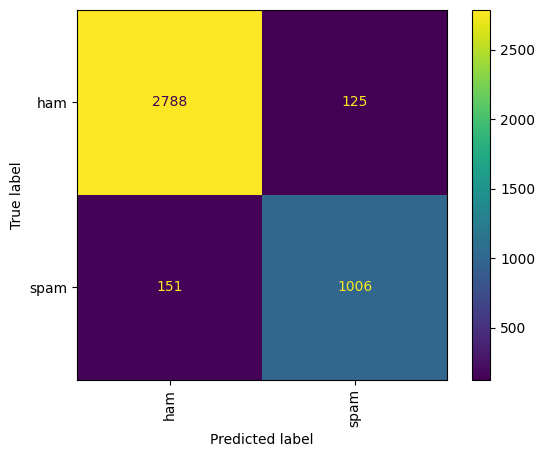

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.xticks(rotation=90)
plt.plot()

In [ ]:
from sklearn.pipeline import Pipeline
model_1 = Pipeline(steps=[
    ('vectorizer', vectorizer),
    ('svc', svc)
])

model_1

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words='english',
                                 tokenizer=<__main__.MyTokenizer object at 0x7ec5d0317c70>)),
                ('svc', SVC(kernel='linear'))])